In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [182]:
image = cv2.imread('04-Black-mirror.png')

In [183]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


In [184]:
contours, _ = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

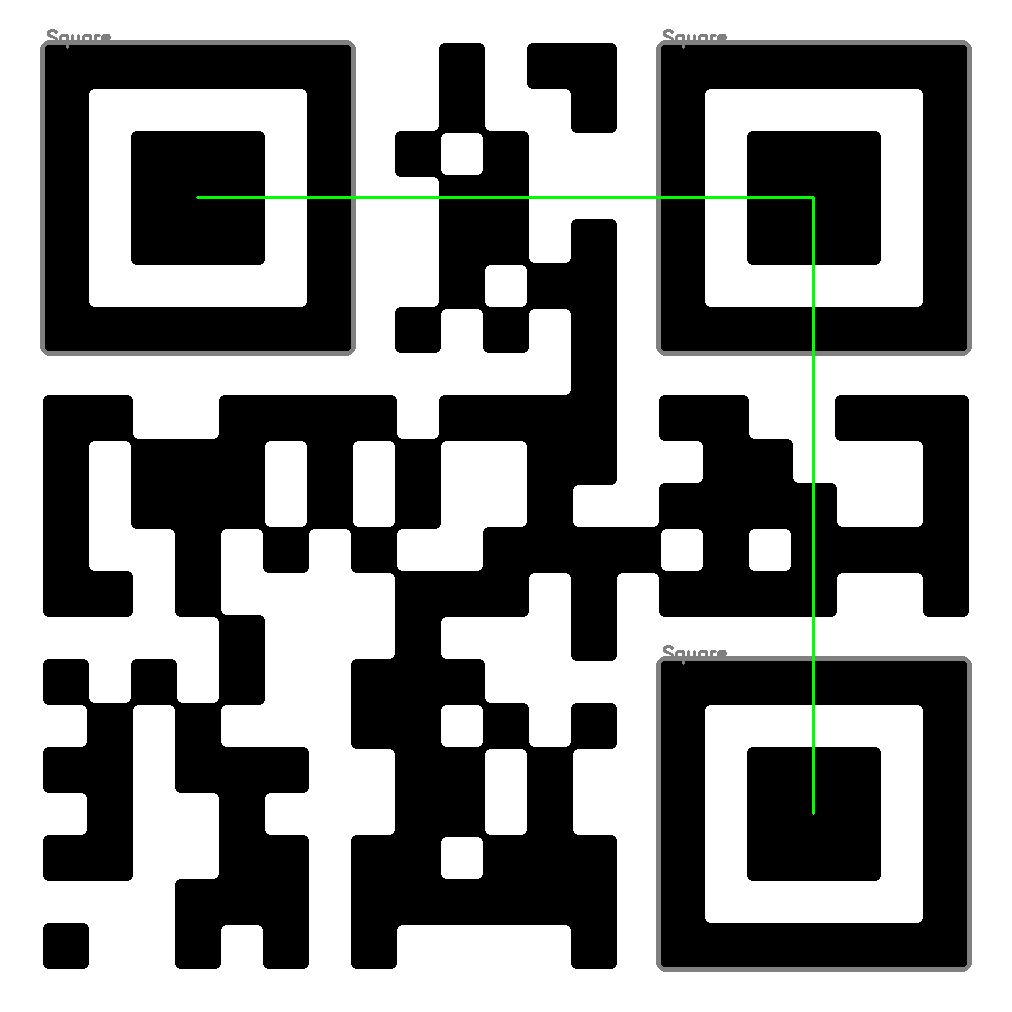

In [185]:
# Initialize list to store squares and their dimensions
squares_with_dimensions = []

# Assuming contours are already defined
for cnt in contours:
    x1, y1 = cnt[0][0]
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        ratio = float(w) / h
        if ratio >= 0.9 and ratio <= 1.1:
            squares_with_dimensions.append((cnt, (x1, y1), w, h))

# Sort squares by area in descending order
squares_with_dimensions.sort(key=lambda x: cv2.contourArea(x[0]), reverse=True)

# Find the largest group of three squares with the same dimensions within a tolerance of ±5 pixels
largest_same_dim_squares = []
i = 0
while i < len(squares_with_dimensions) - 2:
    square_i = squares_with_dimensions[i]
    square_i1 = squares_with_dimensions[i + 1]
    square_i2 = squares_with_dimensions[i + 2]
    w_i, h_i = square_i[2:]
    w_i1, h_i1 = square_i1[2:]
    w_i2, h_i2 = square_i2[2:]
    if (abs(w_i - w_i1) <= 5 and abs(h_i - h_i1) <= 5) and (abs(w_i - w_i2) <= 5 and abs(h_i - h_i2) <= 5):
        largest_same_dim_squares.append((square_i, square_i1, square_i2))
        break
    i += 1

# Draw the contours and add text for square objects
for squares in largest_same_dim_squares:
    for square_info in squares:
        cnt, (x1, y1), _, _ = square_info
        cv2.drawContours(image, [cnt], -1, (128, 128, 128), 3)
        cv2.putText(image, "Square", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128, 128, 128), 2)

# Get centers of squares
square_centers = [[np.mean(square[0], axis=0)[0] for square in squares] for squares in largest_same_dim_squares]

# Draw lines between the centers of adjacent squares
for squares in square_centers:
    for i in range(len(squares) - 1):
        center_i = squares[i]
        center_j = squares[i + 1]
        cv2.line(image, (int(center_i[0]), int(center_i[1])), (int(center_j[0]), int(center_j[1])), (0, 255, 0), 2)


# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()